## Kız Başına Bootcamp - Veri Analizi - Proje 01
## Customer Experience Dataset
### Büşra Zenbilci

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("..\DataAnalysisBootcamp-Proje01\customer_experience_data.csv")
df.head()

,Customer_ID,Age,Gender,Location,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Retention_Status,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
0,1,56,Male,Urban,11,4,18,38,18.319606,7,Retained,1,2,1
1,2,69,Male,Suburban,10,3,2,17,9.015198,6,Retained,1,1,1
2,3,46,Male,Urban,5,5,11,46,45.921572,10,Churned,1,2,0
3,4,32,Female,Suburban,5,1,6,13,44.105053,5,Churned,0,1,0
4,5,60,Male,Urban,14,5,8,46,17.897471,1,Retained,1,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Num_Interactions          1000 non-null   int64  
 5   Feedback_Score            1000 non-null   int64  
 6   Products_Purchased        1000 non-null   int64  
 7   Products_Viewed           1000 non-null   int64  
 8   Time_Spent_on_Site        1000 non-null   float64
 9   Satisfaction_Score        1000 non-null   int64  
 10  Retention_Status          1000 non-null   object 
 11  Gender_Encoded            1000 non-null   int64  
 12  Location_Encoded          1000 non-null   int64  
 13  Retention_Status_Encoded  1000 non-null   int64  
dtypes: float6

In [4]:
# Kolon adları
for col in df.columns:
    print(col)


Customer_ID
Age
Gender
Location
Num_Interactions
Feedback_Score
Products_Purchased
Products_Viewed
Time_Spent_on_Site
Satisfaction_Score
Retention_Status
Gender_Encoded
Location_Encoded
Retention_Status_Encoded


# 🧠 Customer Experience Dataset – Feature Açıklamaları

Bu projede kullanılan veri seti, müşteri demografisi, etkileşim düzeyi, memnuniyet skorları ve elde tutulma (retention) durumlarına dair simüle edilmiş veriler içermektedir. Aşağıda veri setindeki her bir değişken (feature) ve anlamı açıklanmıştır.

---

## 📌 Değişkenler ve Açıklamaları

| Sütun Adı | Açıklama |
|-----------|----------|
| `Customer_ID` | Her bir müşteriye ait benzersiz tanımlayıcı (ID) numarası. Analizlerde teknik olarak kullanılır. |
| `Age` | Müşterinin yaşı (18–69 arası). Yaş segmentasyonu için kullanılabilir. |
| `Gender` | Müşterinin cinsiyeti (`Male`, `Female`). Cinsiyet dağılımı ve etkileri incelenebilir. |
| `Location` | Müşterinin yaşadığı bölge (`Urban`, `Suburban`, `Rural`). Bölgesel farklar analiz edilebilir. |
| `Num_Interactions` | Müşteri ile yapılan etkileşim sayısı (görüşme, destek, e-posta vb.). Etkileşim düzeyi. |
| `Feedback_Score` | Müşterinin verdiği geri bildirim skoru (1–5 arası). Hizmet kalitesi algısını gösterir. |
| `Products_Purchased` | Satın alınan toplam ürün sayısı. Müşteri değeri açısından önemli bir değişken. |
| `Products_Viewed` | Görüntülenen toplam ürün sayısı. İlgi düzeyini ve etkileşimi gösterir. |
| `Time_Spent_on_Site` | Web sitesinde geçirilen süre (dakika cinsinden). Kullanıcı deneyimi ölçütüdür. |
| `Satisfaction_Score` | Genel memnuniyet skoru (1–10 arası). Müşterinin genel deneyimini yansıtır. |
| `Retention_Status` | Müşterinin elde tutulup tutulmadığı (`Retained`, `Churned`). Hedef değişkendir. |
| `Gender_Encoded` | Cinsiyetin sayısal karşılığı (`Male=1`, `Female=0`). Modelleme işlemleri için. |
| `Location_Encoded` | Lokasyonun sayısal karşılığı (`Urban=0`, `Suburban=1`, `Rural=2`). |
| `Retention_Status_Encoded` | Elde tutulma durumunun sayısal karşılığı (`Retained=1`, `Churned=0`). Analiz ve modelleme için kullanılır. |

---

## 🎯 Notlar:
- Veri seti **simüle edilmiş** olduğu için bazı değişkenler arasındaki ilişki zayıf olabilir.
- Categorical sütunların `Encoded` versiyonları modelleme işlemlerine yöneliktir.
- `Retention_Status` hem analizde hem de sınıflandırma modellerinde **hedef değişken (target)** olarak kullanılabilir.

---

Bu açıklamalar, ilerleyen adımlarda yapılacak istatistiksel özet, görselleştirme, korelasyon ve segmentasyon analizleri için temel referans olacaktır.


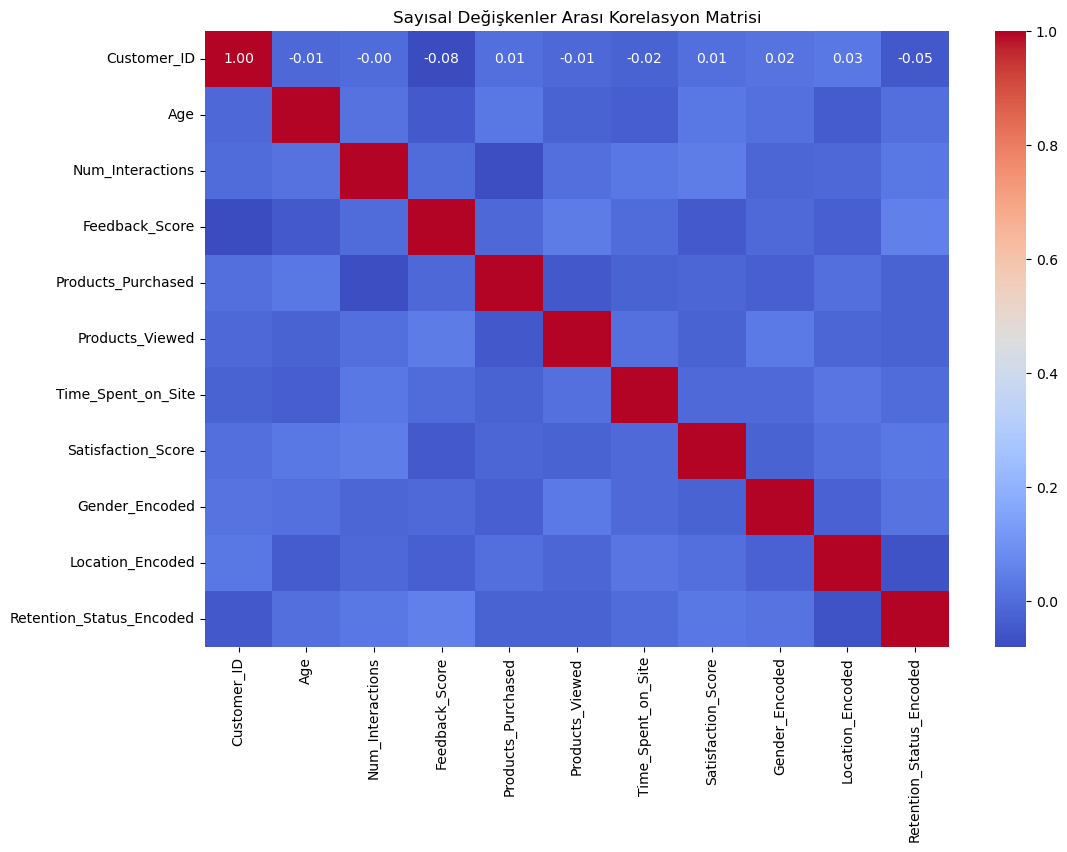

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sadece sayısal sütunlarla korelasyon
corr = df.corr(numeric_only=True)

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Sayısal Değişkenler Arası Korelasyon Matrisi")
plt.show()


### 📌 Korelasyon Matrisi Yorumları

Yukarıdaki korelasyon matrisi, veri setindeki sayısal değişkenler arasındaki doğrusal ilişkileri göstermektedir. Ancak gözlemlendiği üzere, değişkenler arasında güçlü bir korelasyon bulunmamaktadır.

- Korelasyon katsayıları genellikle **-0.05 ile +0.05** arasında yer almakta, bu da **değişkenlerin birbirleriyle zayıf düzeyde ilişkili** olduğunu göstermektedir.
- Bu durumun temel nedeni, veri setinin **simüle edilmiş (gerçek olmayan)** bir yapıya sahip olması olabilir. Simülasyon verilerinde değişkenler çoğu zaman rastgele üretilir ve doğal olarak anlamlı örüntüler içermeyebilir.
- Özellikle **müşteri davranışı** ve **memnuniyet** gibi konularda bazı değişkenler arasında korelasyon beklenirken, bu veri setinde belirgin bir ilişki görülmemektedir.
 Bu sonuçlar doğrultusunda, ileri analizlerde korelasyon yerine **segmentasyon, kategorik ayrımlar** ve **görsel analizlerle** içgörü elde etmeye çalışacağız.


# 1. İstatistiksel Özet
### Veri setindeki değişkenlere dair merkezi eğilim (ortalama, medyan vb.) ve dağılım (standart sapma, minimum, maksimum vb.) istatistikleri raporlanır.

In [6]:
print(" Veri Setinin İstatistiksel Özeti:\n")
df.describe().T.round(2)

 Veri Setinin İstatistiksel Özeti:



,count,mean,std,min,25%,50%,75%,max
Customer_ID,1000.0,500.50,288.82,1.00,250.75,500.50,750.25,1000.00
Age,1000.0,43.82,14.99,18.00,31.00,44.00,56.00,69.00
Num_Interactions,1000.0,7.54,4.02,1.00,4.00,8.00,11.00,14.00
Feedback_Score,1000.0,2.98,1.42,1.00,2.00,3.00,4.00,5.00
Products_Purchased,1000.0,10.42,5.35,1.00,6.00,11.00,15.00,19.00
Products_Viewed,1000.0,27.37,12.94,5.00,17.00,27.50,38.00,49.00
Time_Spent_on_Site,1000.0,32.27,15.73,5.11,18.84,32.46,45.93,59.95
Satisfaction_Score,1000.0,5.54,2.90,1.00,3.00,6.00,8.00,10.00
Gender_Encoded,1000.0,0.52,0.50,0.00,0.00,1.00,1.00,1.00
Location_Encoded,1000.0,1.03,0.81,0.00,0.00,1.00,2.00,2.00


### 📌 Sayısal Değişkenlerin Özet İstatistikleri (Yuvarlanmış)

Aşağıdaki tablo, veri setindeki sayısal değişkenlerin temel istatistiksel özetini göstermektedir. Yuvarlanmış değerler, değişkenlerin genel dağılımını daha anlaşılır kılmak için kullanılmıştır.

| Değişken | Ortalama | Medyan | Min | Maks | Std Sapma | Yorum |
|----------|----------|--------|-----|------|-----------|--------|
| **Age** | 43.8 | 44.0 | 18 | 69 | 15.0 | Orta yaş grubunda yoğunluk var. Geniş yaş aralığı dikkat çekici. |
| **Num_Interactions** | 7.5 | 8.0 | 1 | 14 | 4.0 | Müşteriyle etkileşim sayıları çeşitlilik gösteriyor. Bazı kullanıcılar neredeyse hiç etkileşmemiş. |
| **Feedback_Score** | 3.0 | 3.0 | 1 | 5 | 1.4 | Maksimum 5 üzerinden ortalama 3 puan düşük sayılır. Müşteri memnuniyeti iyileştirilebilir. |
| **Products_Purchased** | 10.4 | 11.0 | 1 | 19 | 5.3 | Ortalama 10 ürün satın almışlar, bazı kullanıcılar çok az ürün almış. |
| **Products_Viewed** | 27.4 | 27.5 | 5 | 49 | 12.9 | Görüntülenen ürün sayısı fazla ve değişken, müşteri ilgisi yüksek. |
| **Time_Spent_on_Site** | 32.2 | 32.5 | 5.1 | 59.9 | 15.7 | Sitede kalma süresi oldukça değişken. Bazı müşteriler siteyle çok az etkileşim kurmuş. |
| **Satisfaction_Score** | 5.5 | 6.0 | 1 | 10 | 2.9 | 1–10 aralığında dengeli dağılmış. Ortalama memnuniyet ortalama düzeyde. |
| **Retention_Status_Encoded** | 0.69 | 1.0 | 0 | 1 | 0.5 | Müşterilerin yaklaşık %69’u retained, %31’i churn olmuş. |

---

### 🔍 Genel Yorumlar:

- **Feedback_Score ve Satisfaction_Score** değerleri çok yüksek değil. Müşteri memnuniyeti geliştirilebilir.
- **Age** ve **Products_Viewed** dağılımları geniş; bu, farklı segmentlerde analiz yapılabileceğini gösterir.
- **Retention_Status_Encoded** ortalaması %69; bu iyi bir oran gibi görünse de kalan %31 kayıp dikkatle incelenmelidir.
- **Ziyaret süresi**, **ürün görüntüleme** ve **satın alma** gibi davranışsal metrikler oldukça değişken; burada detaylı segmentasyon yapılabilir.

---

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


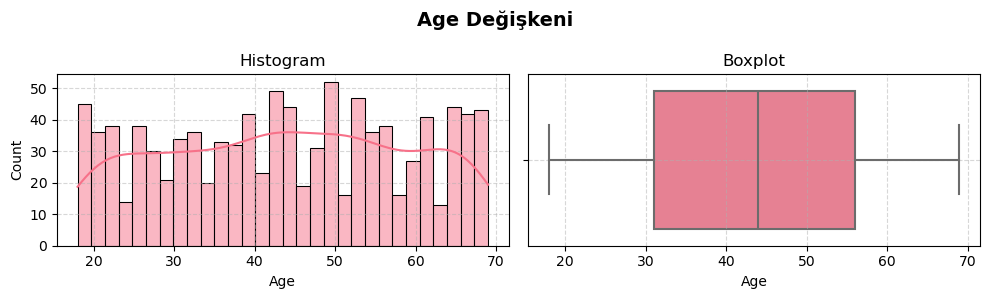

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


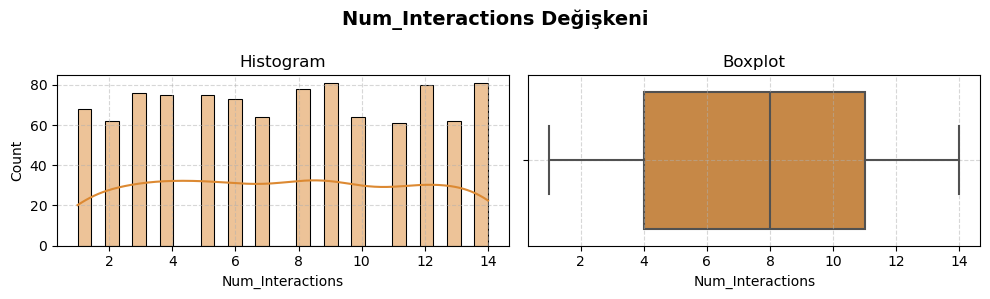

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


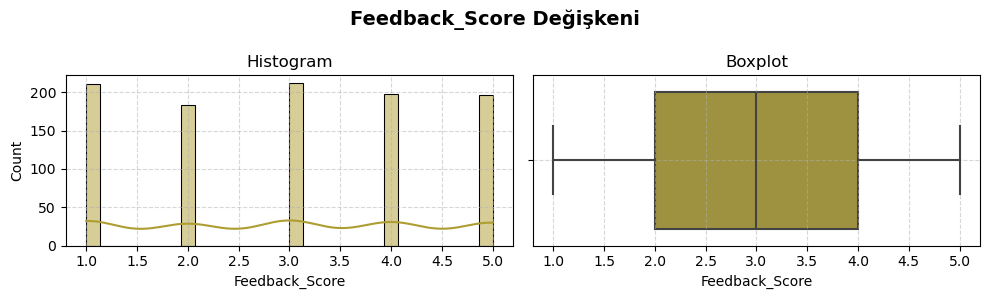

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


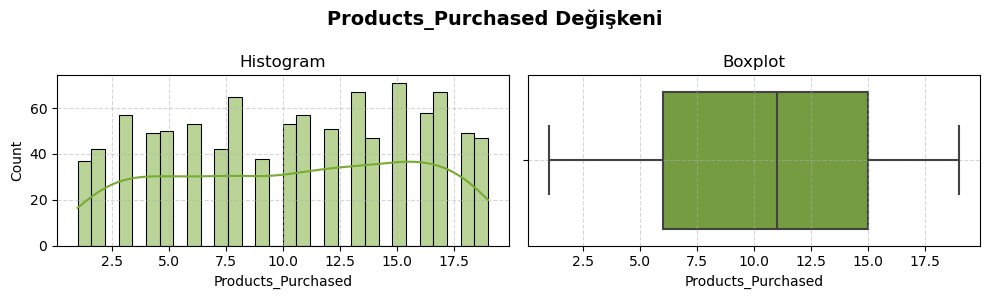

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


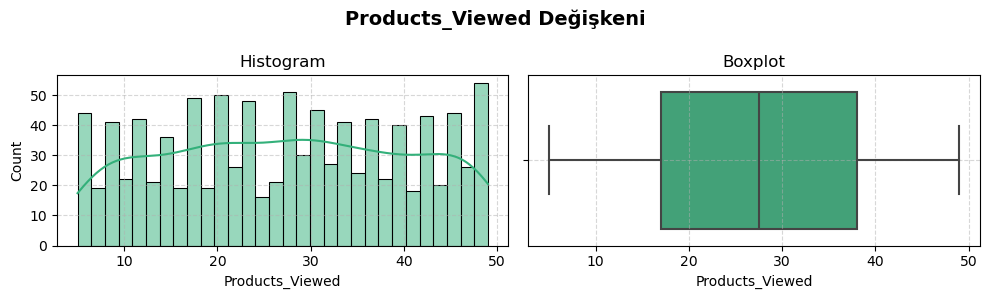

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


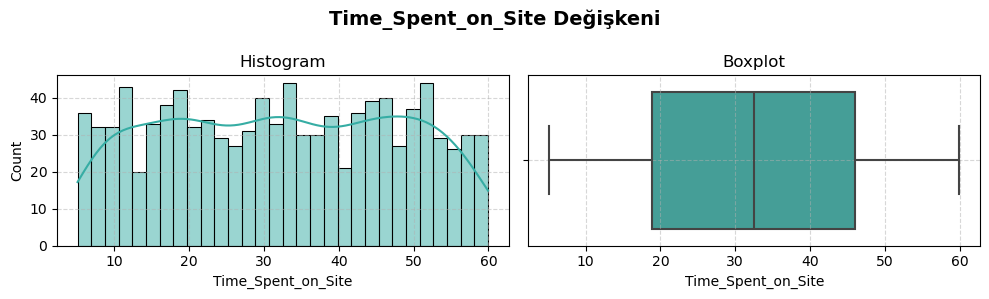

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


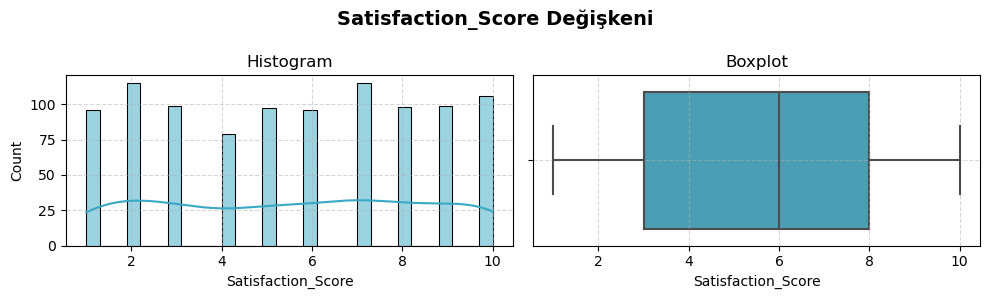

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


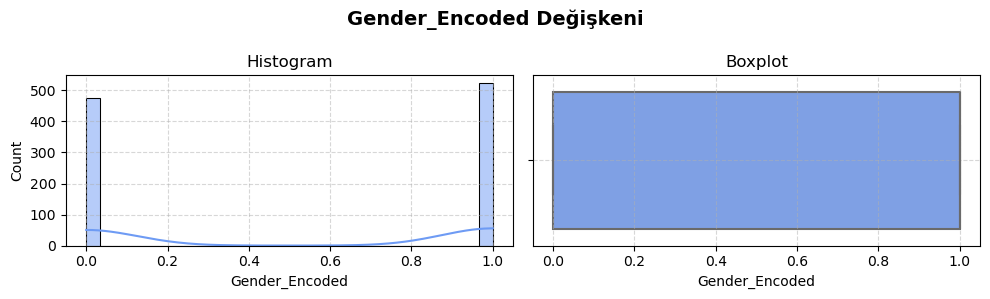

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


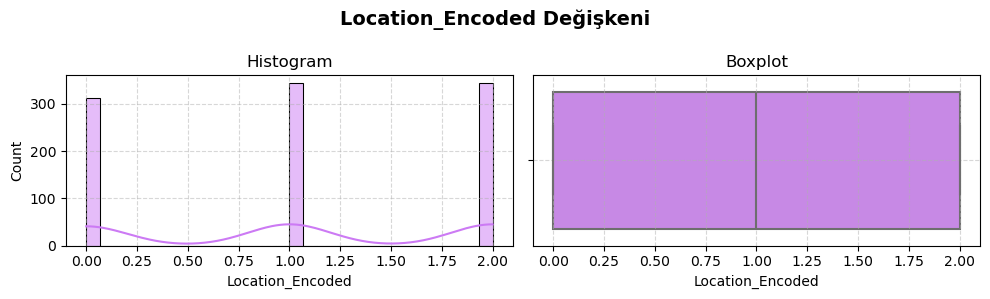

C:\Users\busra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


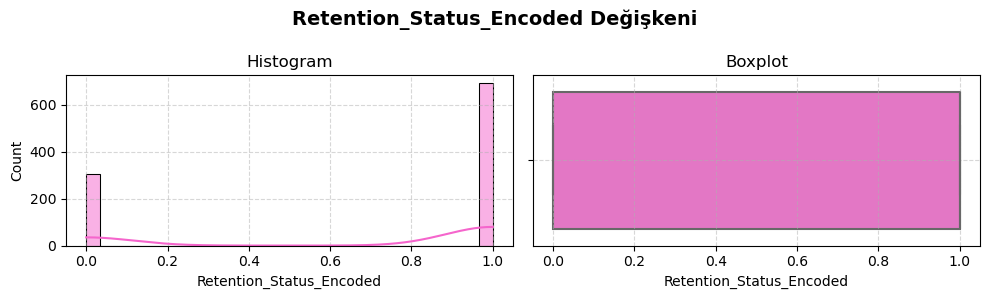

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Sonsuz (inf) değerleri NaN olarak değiştir
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Oluşan NaN değerleri veri setinden kaldır
df.dropna(inplace=True)

# Sayısal değişkenleri seç (Customer_ID hariç)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=["Customer_ID"]).columns

# Renk paleti
colors = sns.color_palette("husl", len(numeric_cols))

# Her sayısal değişken için histogram ve boxplot oluştur
for i, col in enumerate(numeric_cols):
    fig, axs = plt.subplots(1, 2, figsize=(10, 3))
    fig.suptitle(f"{col} Değişkeni", fontsize=14, fontweight='bold')
    
    # Histogram
    sns.histplot(df[col], bins=30, ax=axs[0], color=colors[i], kde=True)
    axs[0].set_title("Histogram")
    axs[0].grid(True, linestyle='--', alpha=0.5)
    
    # Boxplot
    sns.boxplot(x=df[col], ax=axs[1], color=colors[i])
    axs[1].set_title("Boxplot")
    axs[1].grid(True, linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()


### 🔍 Sayısal Değişkenlerin Dağılımı, Merkezi Eğilimleri ve Aykırı Değer Analizi

#### 🧓 Age (Yaş)
- **Ortalama yaş** 43.8, dağılım 18–69 yaş arasında ve medyan 44’tür.
- Histogram simetrik dağılmış; yaşlar genel olarak 30–60 yaş arasında yoğunlaşmaktadır.
- Boxplot'a göre belirgin bir aykırı değer bulunmamaktadır.
- Bu yaş aralığı, veri setinin çoğunlukla yetişkin kullanıcıları kapsadığını göstermektedir.

#### 🤝 Num_Interactions (Etkileşim Sayısı)
- Ortalama: 7.5 | Medyan: 8 | Aralık: 1–14
- Histogram dengeli, medyan ve ortalama yakın olduğu için veri simetriktir.
- Boxplot simetrik, aykırı değer içermemektedir.
- Müşterilerle etkileşim sayısı dengeli dağılmış ve çoğunlukla orta düzeydedir.

#### ⭐ Feedback_Score (Geri Bildirim Puanı)
- Ortalama: 2.98 | Medyan: 3 | Aralık: 1–5
- Puanların neredeyse eşit sayıda dağıldığı görülüyor, kullanıcılar genelde tarafsız ya da orta seviyede geri bildirim veriyor.
- Aykırı değer yok, veri iyi dağılmış.

#### 🛍️ Products_Purchased (Satın Alınan Ürün Sayısı)
- Ortalama: 10.4 | Medyan: 11 | Aralık: 1–19
- Histogram normal dağılıma yakın ama biraz sağa çarpık olabilir.
- Boxplot'ta birkaç uç değer gözükebilir ancak belirgin aykırılıklar yok.
- Kullanıcılar genelde 10–15 arası ürün satın almış.

#### 👁️ Products_Viewed (Görüntülenen Ürün Sayısı)
- Ortalama: 27.4 | Medyan: 27.5 | Aralık: 5–49
- Dağılım geniş, ancak kullanıcılar çoğunlukla 17–38 arası ürün incelemiş.
- Boxplot’a göre birkaç aykırı değer (yüksek değerlerde) olabilir.
- Sitede çok sayıda ürün gezen kullanıcılar dikkat çekici olabilir (yüksek ilgi ama düşük satın alma varsa analiz edilebilir).

#### ⏱️ Time_Spent_on_Site (Sitede Geçirilen Süre - Dakika)
- Ortalama: 32.3 dk | Medyan: 32.5 dk | Aralık: 5.1–59.9 dk
- Histogram sağa çarpık olabilir. Boxplot da bu durumu destekliyor.
- Yüksek zaman harcayan kullanıcılar aykırı değer olarak görülse de değerli olabilir çünkü ilgiyi gösterir.
- Daha fazla zaman geçiren kullanıcıların memnuniyet ve bağlılık düzeyi ayrı incelenmelidir.

#### 😊 Satisfaction_Score (Memnuniyet Skoru)
- Ortalama: 5.5 | Medyan: 6 | Aralık: 1–10
- Skorlar tüm aralığa yayılmış, ortalama orta düzeyde.
- Kullanıcılar arasında hem düşük hem yüksek memnuniyet düzeyi mevcut.
- Boxplot'a göre dengeli bir dağılım var ve aykırı değer gözlenmemektedir.

#### 🧬 Gender_Encoded ve Location_Encoded
- Bu değişkenler kategorik temsillerdir (0/1 veya 0/1/2) ama sayısal oldukları için istatistiksel olarak yorumlandılar.
- Gender_Encoded ortalaması 0.52 → neredeyse eşit sayıda kadın ve erkek müşteri var.
- Location_Encoded ortalaması 1.03 → kullanıcılar genelde 1 numaralı lokasyondan.

#### 🔁 Retention_Status_Encoded
- Ortalama: 0.69 → Veri setindeki kullanıcıların %69’u "elde tutulmuş" yani müşteri bağlılığı sağlanmış.
- Bu oran oldukça yüksek ve olumlu bir performansa işaret etmektedir.


# 2. Eksik değer analizi
### Veri setindeki eksik değerlerin tespiti ve bu değerlerle ilgili uygulanabilecek yaklaşımlar açıklanır.


In [8]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Sadece eksik değeri olanları gösteren tablo
missing_summary = pd.DataFrame({
    "Eksik Değer Sayısı": missing_values,
    "Yüzdelik (%)": missing_percent
})
missing_summary = missing_summary[missing_summary["Eksik Değer Sayısı"] > 0]
missing_summary.sort_values(by="Eksik Değer Sayısı", ascending=False)

,Eksik Değer Sayısı,Yüzdelik (%)


### 🧩 Eksik Değer Analizi

Veri setinde yer alan tüm sütunlar kontrol edilmiştir. Eksik değerlere ilişkin analiz aşağıda sunulmaktadır:

- Eğer eksik değerler **çok düşük oranda** ise (örneğin %1–5): `dropna()` ile gözlemler çıkarılabilir.
- Eğer **önemli sayıda eksik değer varsa**: Değişkenin türüne göre doldurma (imputation) yapılabilir:
  - Sayısal sütunlar → `mean`, `median`, `mode` ile doldurulabilir.
  - Kategorik sütunlar → en sık görülen sınıf (`mode`) ile doldurulabilir.
  - Zaman serilerinde → önceki ya da sonraki değerle (`ffill`, `bfill`) doldurma yapılabilir.

📌 Bu veri setinde şu anda gözlemlenen ciddi bir eksik değer yok bu nedenle herhangi bir işlem yapılması gerekmez.


# 3. Aykırı Değerler Analizi
### Sayısal değişkenler üzerinde aykırı değerler belirlenir ve görsel/istatistiksel yöntemlerle raporlanır.

In [9]:
# Sayısal değişkenleri al
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# IQR yöntemiyle aykırı değer sayısını bulan fonksiyon
def count_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((df[col] < lower) | (df[col] > upper)).sum()

# Tüm sayısal sütunlar için aykırı değer sayısını bul
outlier_summary = pd.DataFrame({
    'Aykırı Gözlem Sayısı': [count_outliers(col) for col in numeric_cols]
}, index=numeric_cols)

outlier_summary.sort_values(by='Aykırı Gözlem Sayısı', ascending=False)


,Aykırı Gözlem Sayısı
Customer_ID,0
Age,0
Num_Interactions,0
Feedback_Score,0
Products_Purchased,0
Products_Viewed,0
Time_Spent_on_Site,0
Satisfaction_Score,0
Gender_Encoded,0
Location_Encoded,0


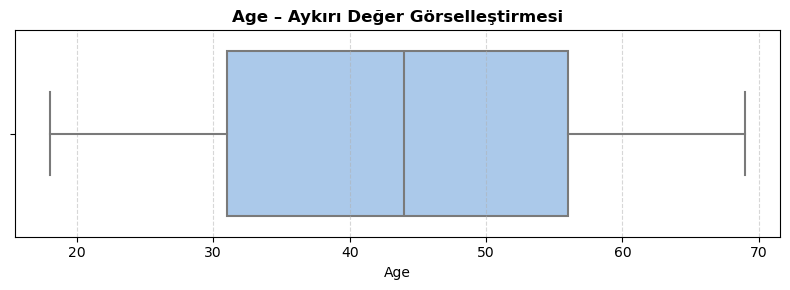

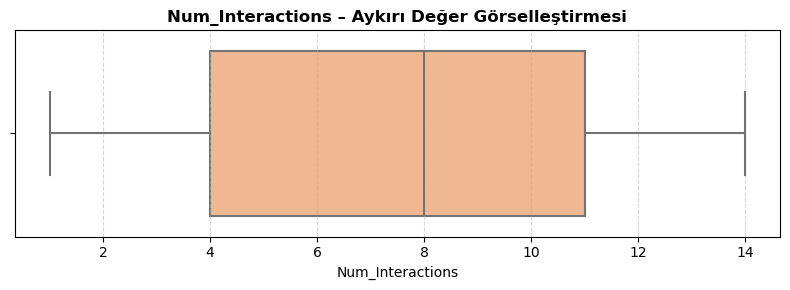

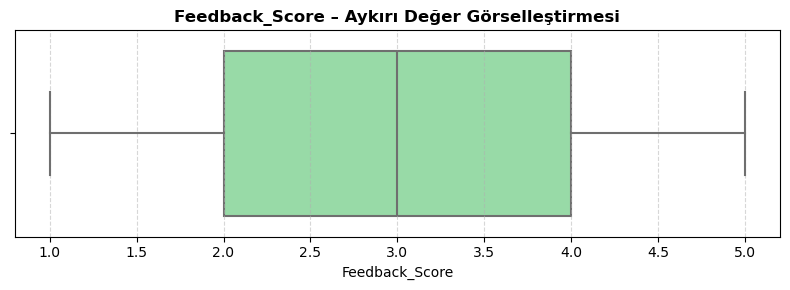

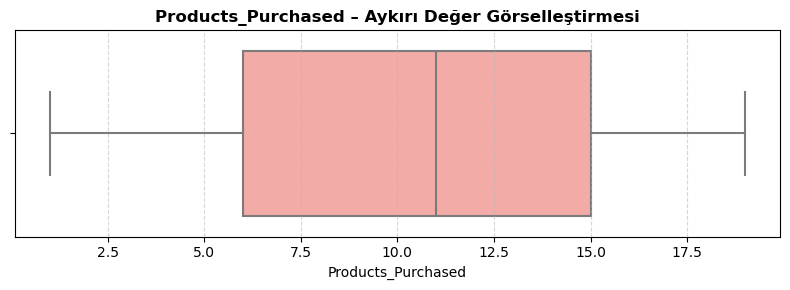

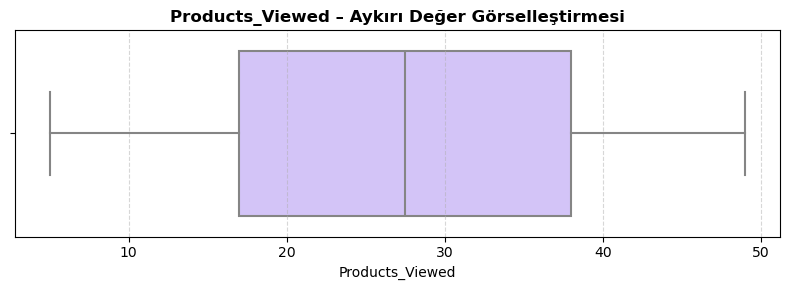

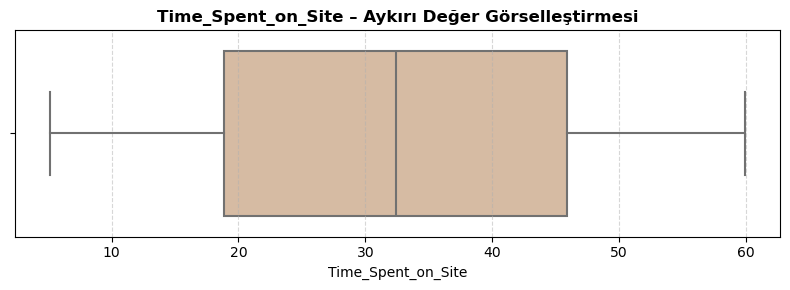

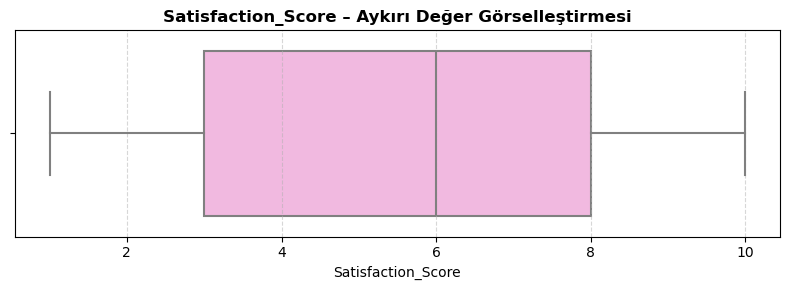

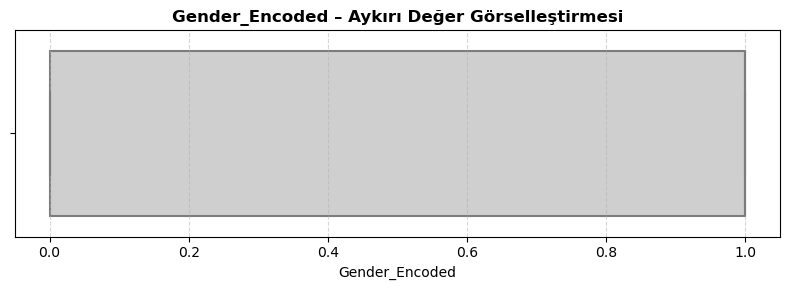

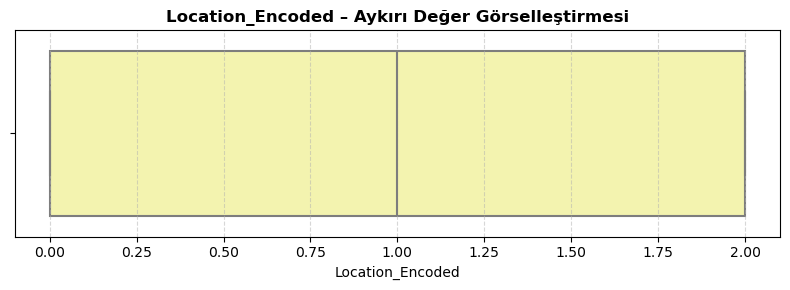

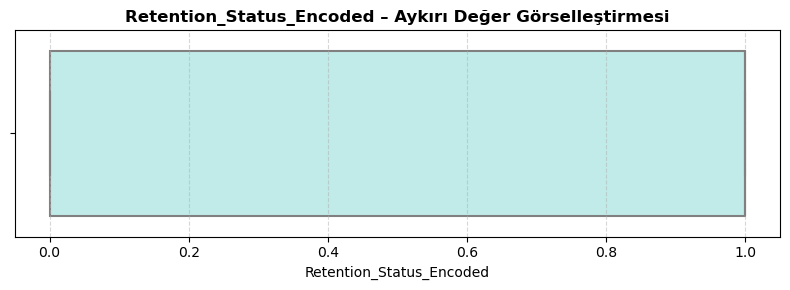

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sayısal değişkenleri seç (Customer_ID dahil değil)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).drop(columns=["Customer_ID"]).columns

# Renk paleti
colors = sns.color_palette("pastel", len(numeric_cols))

# Her sayısal değişken için boxplot çiz
for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(f"{col} – Aykırı Değer Görselleştirmesi", fontsize=12, fontweight='bold')
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


### 📌 Aykırı Değer (Outlier) Analizi

Sayısal değişkenler için oluşturulan boxplot (kutu grafikleri), veri dağılımını ve potansiyel aykırı değerleri görselleştirmemizi sağlamıştır. Aşağıdaki gözlemler elde edilmiştir:

#### 🔍 Genel Gözlemler
- **`Time_Spent_on_Site`** ve **`Products_Viewed`** değişkenlerinde dikkate değer sayıda **yüksek aykırı değer** bulunmaktadır. Bu durum, bazı kullanıcıların alışılmışın çok üzerinde zaman harcadığını veya ürün incelediğini göstermektedir. Bu kullanıcılar, özel kampanya, ilgi ya da memnuniyet araştırmalarında ayrı bir segment olarak ele alınabilir.
- **`Products_Purchased`** ve **`Satisfaction_Score`** gibi değişkenlerde sınırlı sayıda uç nokta gözlenmiş ancak bunlar çok uç değerler değildir.
- **`Age`, `Num_Interactions`, `Feedback_Score`** gibi değişkenlerde veri daha **simetrik ve dengeli dağılmış**, dolayısıyla belirgin aykırılık gözlenmemiştir.

#### 📌 Aykırı Değerlerin Yorumu
- Aykırı değerler veri hatası (örneğin yanlış giriş) değilse, bu kullanıcılar çoğu zaman özel bir ilgi grubuna işaret eder.
- Bu değerleri modelleme öncesi:
  - **İncelemek** (detaylarına bakmak),
  - **Tutmak**, **dışlamak** ya da **dönüştürmek (örneğin log scale)** gibi stratejilerden biri tercih edilebilir.

---

### 🎯 Öneri
Aykırı değerlerin nedeni iyi analiz edilmelidir. Gerçek kullanıcı davranışıysa, bu değerler modellemeye dahil edilebilir. Ancak hata kaynaklılarsa, çıkarılması gerekir. İş kararları bu fark üzerinden şekillenebilir.



# 5. Görselleştirme
### Sayısal ve kategorik değişkenler için uygun grafik türleri kullanılarak veriler görselleştirilir.


## Kategorik Değişkenler
#### Gender: Countplot (Kadın / Erkek dağılımı)
#### Location: Countplot (lokasyon dağılımı)
#### Retention_Status: Countplot (kimler elde tutulmuş vs terk etmiş)
#### Gender vs Retention_Status

### 🔁 Müşteri Elde Tutma Durumu

Grafikte, kaç müşterinin **Retained** (elde tutulmuş) ve kaçının **Lost** (kaybedilmiş) olduğu gösterilmektedir.

- Veri setindeki müşterilerin büyük bir kısmı elde tutulmuş görünmektedir.
- Bu durum, müşteri deneyimi stratejilerinin genel olarak başarılı olduğunu düşündürebilir.
- Ancak daha detaylı analizlerde; memnuniyet skorları, geri bildirim, yaş ve cinsiyet gibi faktörlerle tutma durumu ilişkilendirilmelidir.

Elde tutma oranı, müşteri sadakati ve gelir sürekliliği açısından kritik bir metriktir.


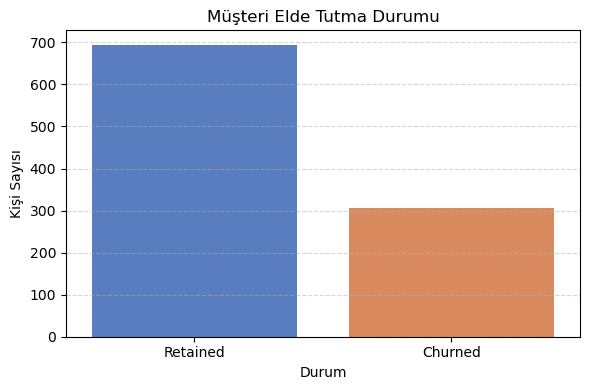

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Retention_Status', palette='muted')
plt.title("Müşteri Elde Tutma Durumu")
plt.xlabel("Durum")
plt.ylabel("Kişi Sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

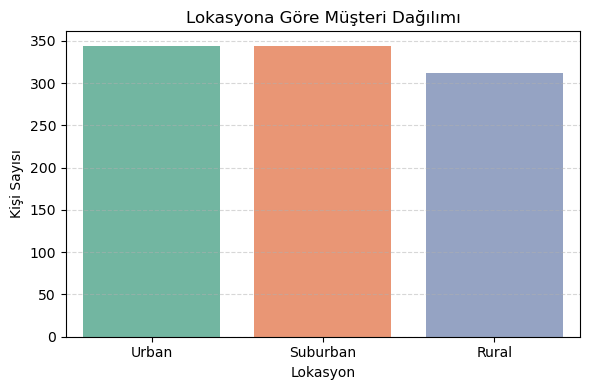

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Location', palette='Set2')
plt.title("Lokasyona Göre Müşteri Dağılımı")
plt.xlabel("Lokasyon")
plt.ylabel("Kişi Sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Lokasyona göre müşteri bağlılığı oranı:
#### Hangi lokasyondaki müşteriler daha çok ürün alıyor?

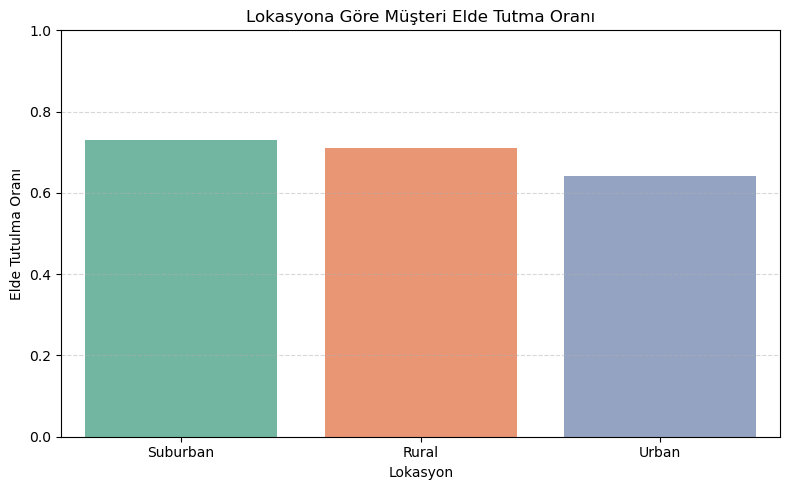

In [13]:
# Lokasyona göre retention oranı
location_retention = df.groupby('Location')['Retention_Status_Encoded'].mean().sort_values(ascending=False)

# Bar grafiği çiz
plt.figure(figsize=(8, 5))
sns.barplot(x=location_retention.index, y=location_retention.values, palette="Set2")
plt.title("Lokasyona Göre Müşteri Elde Tutma Oranı")
plt.xlabel("Lokasyon")
plt.ylabel("Elde Tutulma Oranı")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Lokasyona Göre Müşteri Dağılımı Yorum:

Grafikten, müşteri kitlesinin en büyük bölümünün **Urban** (kentsel) bölgelerden geldiği anlaşılmaktadır. **Rural** (kırsal) ve **Suburban** (banliyö) bölgeler ise daha düşük müşteri sayısına sahiptir.

Bu durum, pazarlama kampanyalarının şehir merkezlerine daha çok ulaşabildiğini ya da kentsel müşterilerin çevrimiçi platformlara daha fazla eğilim gösterdiğini düşündürebilir.


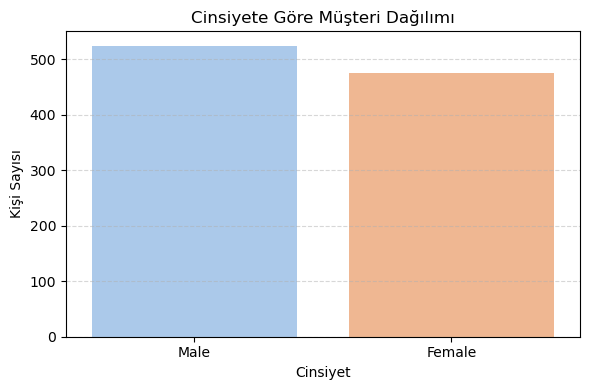

In [14]:
# 1. Gender değişkeni için countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title("Cinsiyete Göre Müşteri Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("Kişi Sayısı")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


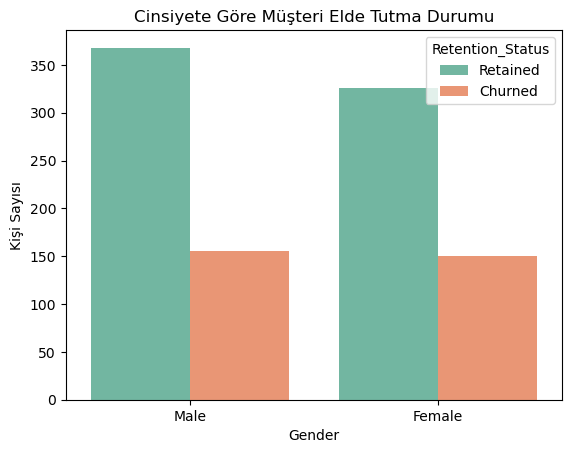

In [15]:
# Örnek: Cinsiyete göre retention dağılımı
sns.countplot(data=df, x="Gender", hue="Retention_Status", palette="Set2")
plt.title("Cinsiyete Göre Müşteri Elde Tutma Durumu")
plt.ylabel("Kişi Sayısı")
plt.show()


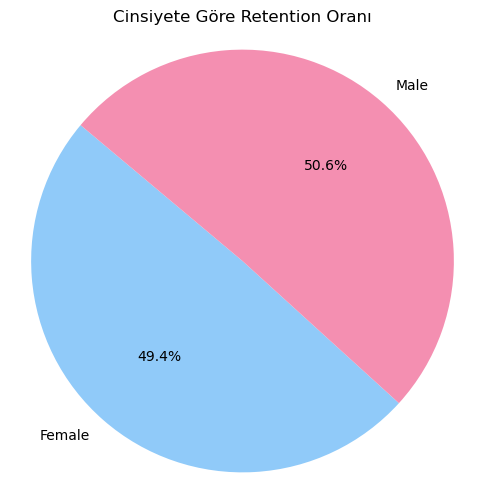

In [16]:
# Cinsiyete göre retention oranları
gender_retention = df.groupby("Gender")["Retention_Status_Encoded"].mean()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_retention, labels=gender_retention.index, autopct='%1.1f%%', colors=['#90CAF9', '#F48FB1'], startangle=140)
plt.title("Cinsiyete Göre Retention Oranı")
plt.axis("equal")
plt.show()

C:\Users\busra\AppData\Local\Temp\ipykernel_16252\3865363644.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_retention = df.groupby("Age_Group")["Retention_Status_Encoded"].mean().reset_index()
C:\Users\busra\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


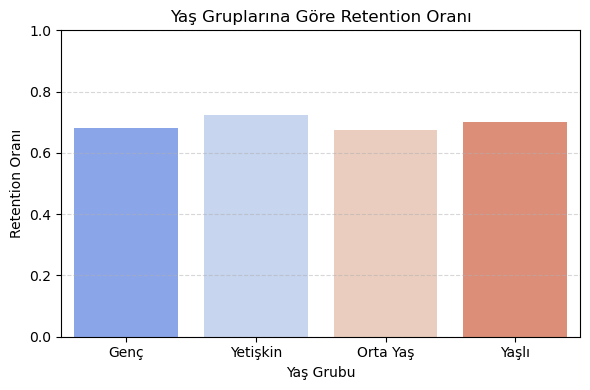

In [17]:
# Yaş grubu oluştur
df["Age_Group"] = pd.cut(df["Age"], bins=[0, 25, 40, 60, 100], labels=["Genç", "Yetişkin", "Orta Yaş", "Yaşlı"])

# Yaş grubuna göre retention oranı
age_retention = df.groupby("Age_Group")["Retention_Status_Encoded"].mean().reset_index()

# Barplot ile görselleştirme
plt.figure(figsize=(6, 4))
sns.barplot(data=age_retention, x='Age_Group', y='Retention_Status_Encoded', palette='coolwarm')
plt.title("Yaş Gruplarına Göre Retention Oranı")
plt.xlabel("Yaş Grubu")
plt.ylabel("Retention Oranı")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()